In [1]:
import numpy as np 
from sympy import * 
from sympy.physics.mechanics import *
from Induced_geometry import *

### Embedded 3-sphere
$$ds^2 = \frac{a^2}{a^2 - r^2} dr^2 + r^2 d\theta^2 + r^2 \sin^2 \theta d\phi^2$$

In [2]:
# 1. Declare the symbolic variables.
a,r,θ,ϕ = symbols('a,r,θ,ϕ', real = True)

# 2. Create a list with the space-time variables.
var = [r,θ,ϕ]

# 3. Metric.
g = np.diag([a**2/(-r**2+a**2),r**2,r**2 * sin(θ)**2])

Matrix(g)

Matrix([
[a**2/(a**2 - r**2),    0,              0],
[                 0, r**2,              0],
[                 0,    0, r**2*sin(θ)**2]])

In [3]:
# 4. Compute the induced geometry instance
Geom = Induced_geometry(g,var)

In [4]:
# 5. Compute some elements
Matrix(Geom.ricci_tensor)

Matrix([
[2/(a**2 - r**2),           0,                     0],
[              0, 2*r**2/a**2,                     0],
[              0,           0, 2*r**2*sin(θ)**2/a**2]])

In [5]:
Geom.christoffel_symbol

array([[[r/(a**2 - r**2), 0, 0],
        [0, -r + r**3/a**2, 0],
        [0, 0, r*(-a**2 + r**2)*sin(θ)**2/a**2]],

       [[0, 1/r, 0],
        [1/r, 0, 0],
        [0, 0, -sin(2*θ)/2]],

       [[0, 0, 1/r],
        [0, 0, 1/tan(θ)],
        [1/r, 1/tan(θ), 0]]], dtype=object)

In [6]:
Geom.ricci_scalar

6/a**2

### FLRW 
$$ds^2 = - dt^2 + a(t) \delta_{ij} dx^i dx^j$$

In [7]:
t,x,y,z = symbols('t,x,y,z', real = True)
a = dynamicsymbols('a',real = True)
var = ['t',x,y,z]

g = np.diag([-1,a**2,a**2,a**2])
Matrix(g)

Matrix([
[-1,       0,       0,       0],
[ 0, a(t)**2,       0,       0],
[ 0,       0, a(t)**2,       0],
[ 0,       0,       0, a(t)**2]])

In [8]:
FLRW = Induced_geometry(g,var)

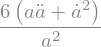

In [9]:
init_vprinting()
FLRW.ricci_scalar

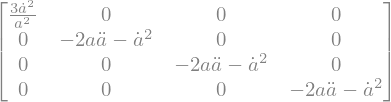

In [10]:
Matrix(FLRW.einstein_tensor)